# Supervised Learning Challenge - Description

Goal: given many features and a target variable (binary: 1 or 0), find the ML model that leads to the best F1-Score

Each row in the ‘data’ belongs to a ‘measurement’ and each column represents a ‘feature’. For each row in the ‘data’ you have a corresponding class label in ‘target’. You can consider the row-numbers as keys.

In [427]:
# import librairies and functions
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_log_error, mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from scipy.stats import norm
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

# Read and clean dataset

In [9]:
# read datasets
data = pd.read_csv('data.csv',header=None)
target = pd.read_csv('target.csv',header=None)

In [21]:
# merge both datasets
df=target.merge(data, how='outer', left_index=True, right_index=True)

In [22]:
df.head()

,0_x,0_y,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,128,129
0,0,0.979587,0.097772,1.583331,1.931710,0.644842,-0.278137,1.151631,0.570353,-1.292430,...,0.424377,9.346990,-5.463344,0.469712,2.129638,-0.160006,4.543330,3.247132,-3.511270,-1.176519
1,0,-0.376475,0.921357,0.421965,0.263991,-0.385927,1.248546,-1.128609,0.017480,0.375447,...,-0.846134,7.539836,1.896463,-1.022318,-4.374391,0.102430,-0.682120,-3.232093,1.652254,0.646192
2,0,0.559581,1.489348,0.909945,0.988210,-1.736031,-0.438995,0.939603,0.223140,0.250078,...,0.841913,7.575404,6.480101,-0.591365,-2.216795,0.527426,-1.029213,-5.699445,1.492750,-0.899959
3,0,-0.085182,-0.375702,0.225221,-0.889564,0.968041,0.523566,1.016407,-0.034082,-0.235755,...,0.718677,-6.028629,1.422721,0.799216,-0.078402,-0.347944,-2.694026,-1.660664,-3.420544,0.598411
4,0,-0.978559,-0.104433,0.299653,-0.766096,-1.009046,1.736693,-0.582867,-0.758655,1.545842,...,-0.533516,6.470671,1.475969,0.790975,0.333542,0.260437,1.069074,-10.060220,-8.257219,0.960365


In [346]:
# replace column name from string into integer
df=df.rename(columns = {'0':0})

In [347]:
df.head()

,target,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,128,129
0,0,0.979587,0.097772,1.583331,1.931710,0.644842,-0.278137,1.151631,0.570353,-1.292430,...,0.424377,9.346990,-5.463344,0.469712,2.129638,-0.160006,4.543330,3.247132,-3.511270,-1.176519
1,0,-0.376475,0.921357,0.421965,0.263991,-0.385927,1.248546,-1.128609,0.017480,0.375447,...,-0.846134,7.539836,1.896463,-1.022318,-4.374391,0.102430,-0.682120,-3.232093,1.652254,0.646192
2,0,0.559581,1.489348,0.909945,0.988210,-1.736031,-0.438995,0.939603,0.223140,0.250078,...,0.841913,7.575404,6.480101,-0.591365,-2.216795,0.527426,-1.029213,-5.699445,1.492750,-0.899959
3,0,-0.085182,-0.375702,0.225221,-0.889564,0.968041,0.523566,1.016407,-0.034082,-0.235755,...,0.718677,-6.028629,1.422721,0.799216,-0.078402,-0.347944,-2.694026,-1.660664,-3.420544,0.598411
4,0,-0.978559,-0.104433,0.299653,-0.766096,-1.009046,1.736693,-0.582867,-0.758655,1.545842,...,-0.533516,6.470671,1.475969,0.790975,0.333542,0.260437,1.069074,-10.060220,-8.257219,0.960365


In [25]:
df=df.rename(columns = {'0_x':'target'})

In [26]:
df.head()

,target,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,128,129
0,0,0.979587,0.097772,1.583331,1.931710,0.644842,-0.278137,1.151631,0.570353,-1.292430,...,0.424377,9.346990,-5.463344,0.469712,2.129638,-0.160006,4.543330,3.247132,-3.511270,-1.176519
1,0,-0.376475,0.921357,0.421965,0.263991,-0.385927,1.248546,-1.128609,0.017480,0.375447,...,-0.846134,7.539836,1.896463,-1.022318,-4.374391,0.102430,-0.682120,-3.232093,1.652254,0.646192
2,0,0.559581,1.489348,0.909945,0.988210,-1.736031,-0.438995,0.939603,0.223140,0.250078,...,0.841913,7.575404,6.480101,-0.591365,-2.216795,0.527426,-1.029213,-5.699445,1.492750,-0.899959
3,0,-0.085182,-0.375702,0.225221,-0.889564,0.968041,0.523566,1.016407,-0.034082,-0.235755,...,0.718677,-6.028629,1.422721,0.799216,-0.078402,-0.347944,-2.694026,-1.660664,-3.420544,0.598411
4,0,-0.978559,-0.104433,0.299653,-0.766096,-1.009046,1.736693,-0.582867,-0.758655,1.545842,...,-0.533516,6.470671,1.475969,0.790975,0.333542,0.260437,1.069074,-10.060220,-8.257219,0.960365


In [28]:
X.shape

(10000, 130)

In [30]:
y.shape

(10000,)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 131 entries, target to 129
dtypes: float64(130), int64(1)
memory usage: 10.4 MB


In [33]:
df.describe()

,target,0,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,128,129
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.150400,0.001604,0.008515,0.002724,0.019354,-0.008432,0.016813,-0.020166,0.008243,0.009072,...,-0.012930,0.632505,-0.148051,0.015104,-0.011418,0.023095,-0.138114,-2.742102,-0.876277,-0.007515
std,0.357481,0.997142,0.995935,1.005931,0.998702,1.009299,1.003969,1.007481,1.000603,1.001253,...,0.996323,7.221436,2.884456,0.998945,2.839327,1.011117,2.973730,6.637509,2.727291,1.000851
min,0.000000,-3.480849,-3.627768,-4.644419,-3.950389,-3.914232,-3.745899,-3.984321,-3.492909,-3.831330,...,-3.729316,-25.854842,-9.767808,-3.759075,-10.995756,-3.759983,-10.296626,-26.378422,-11.272795,-3.681470
25%,0.000000,-0.671330,-0.670432,-0.671124,-0.653056,-0.695833,-0.654792,-0.693180,-0.673707,-0.663096,...,-0.681897,-4.165513,-2.093881,-0.663806,-1.919634,-0.651698,-2.169846,-7.120884,-2.701503,-0.695729
50%,0.000000,-0.005046,0.018327,0.013105,0.031756,0.004204,0.021814,-0.039115,0.004648,0.022115,...,-0.008353,0.618562,-0.152480,0.018839,-0.004774,0.008826,-0.271536,-2.692635,-0.829729,-0.003683
75%,0.000000,0.668665,0.680060,0.679033,0.679965,0.668766,0.698460,0.661771,0.679320,0.692635,...,0.650562,5.470996,1.847034,0.689668,1.946152,0.709242,1.759221,1.751729,0.956035,0.673625
max,1.000000,4.289265,3.668093,3.985917,3.820525,3.713014,3.806778,3.701877,4.365124,3.906146,...,3.593861,27.340146,10.381348,3.859376,9.796907,3.856889,12.419102,26.660775,9.292840,3.371165


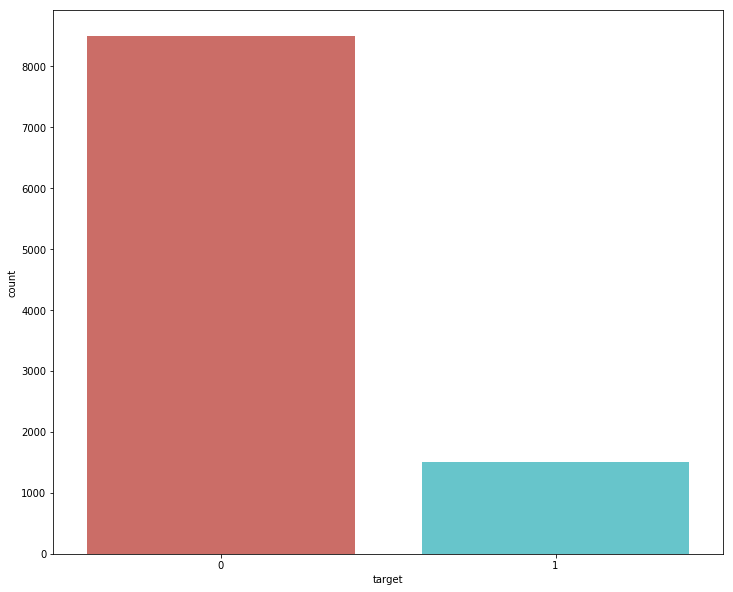

In [179]:
#count the number of negative and positive (binary variable) for column target
sns.countplot(x='target', data=df, palette='hls')
plt.show()

In [36]:
# get percentage
df['target'].value_counts()/len(df)

0    0.8496
1    0.1504
Name: target, dtype: float64

- No missing values

- Only numerical features

- target: binary variable: 0, 1

There is an imbalance in the target. 3 solutions:
- Upsampling class 0
- Downsampling class 1
- autmatic data balancing: class_weight = 'balanced'

# Feature engineering

## Features correlation

In [57]:
def plot_high_corr_feats(df, target, threshold=.95): 
    
    corr = df.corr()
    fltr=corr[corr>threshold].sum() > 1
    
    high_cor_cols = list(corr[fltr].index)
    
    print('columns that are highly correlated: \n', high_cor_cols)
    
    df = df[[target,] + high_cor_cols]
    corr = df.corr()
    sns.heatmap(corr, annot=True)
    
    plt.show()
        
    return high_cor_cols

columns that are highly correlated: 
 [15, 18, 29, 38, 39, 58, 63, 78, 111, 121, 124, 127]


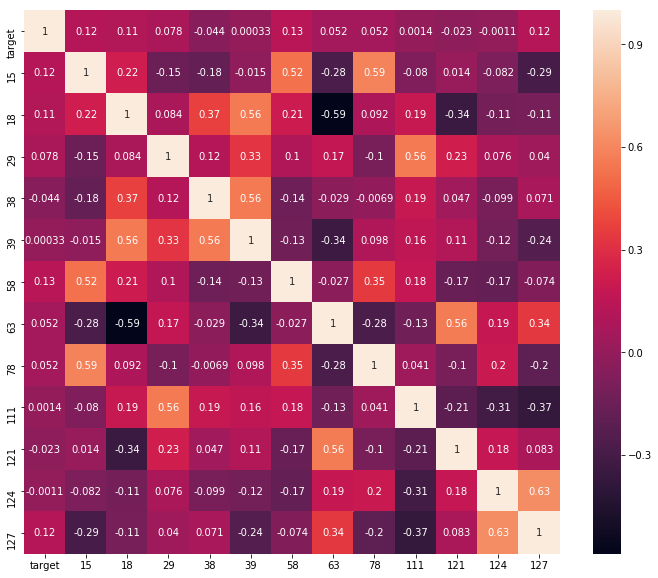

In [180]:
# plot correlation matrix
high_corr_feat = plot_high_corr_feats(df, 'target', 0.5)

In [97]:
# check correlation with the target
corr = df.corr()
threshold =  .05
print('features that have correlation with the TARGET above the threshold: ')
high_corr_feats = corr.loc[corr['target'] > threshold,'target'].index
print(high_corr_feats)

features that have correlation with the TARGET above the threshold: 
Index(['target', 9, 15, 18, 29, 33, 56, 58, 63, 64, 78, 83, 87, 118, 127, 128], dtype='object')


In [98]:
# these are the features above 0.05
X_selected = [9, 15, 18, 29, 33, 56, 58, 63, 64, 78, 83, 87, 118, 127, 128]

## Features distribution

In [48]:
def normal_distribution(X0):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(X0)

    # Plot the histogram.
    plt.hist(X0, bins=25, density=True, alpha=0.6, color='g')
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

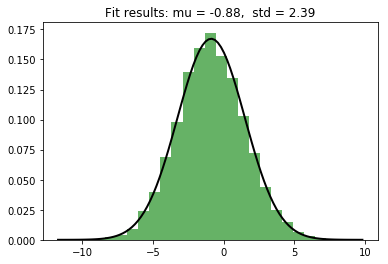

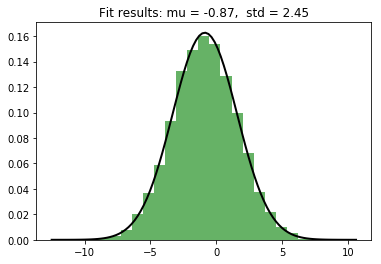

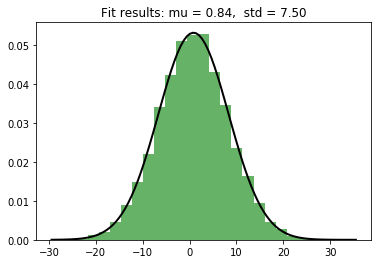

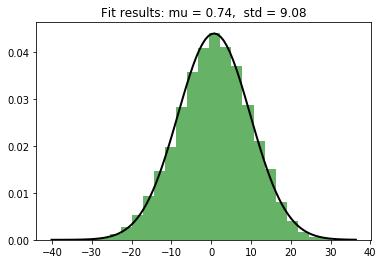

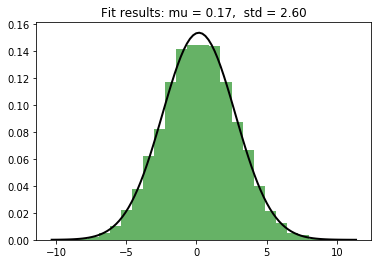

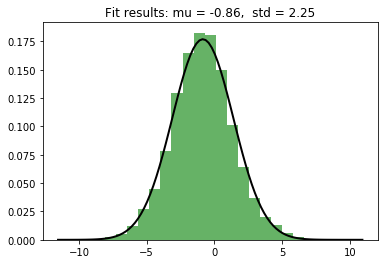

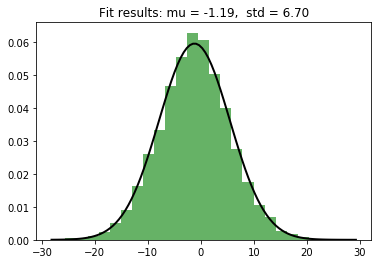

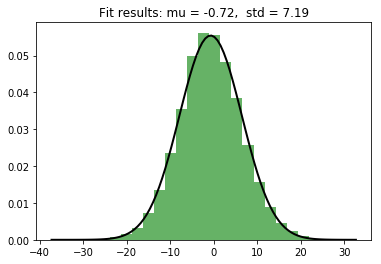

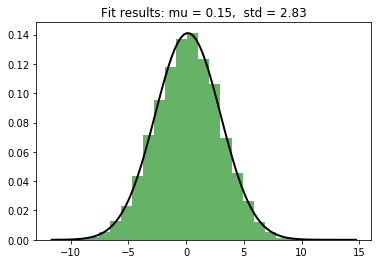

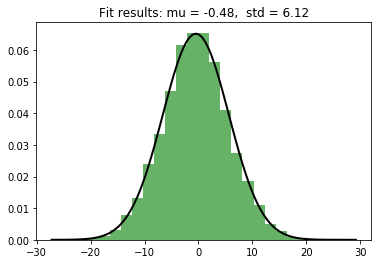

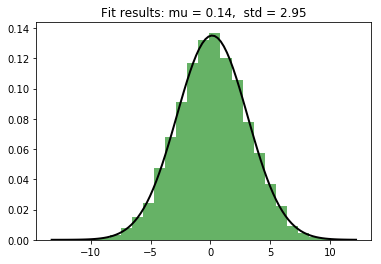

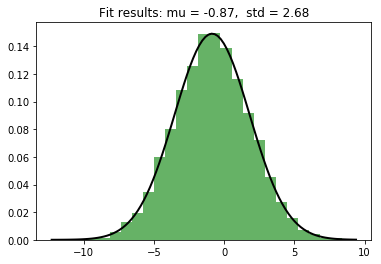

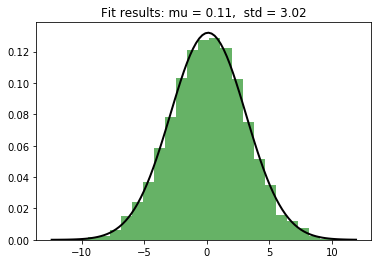

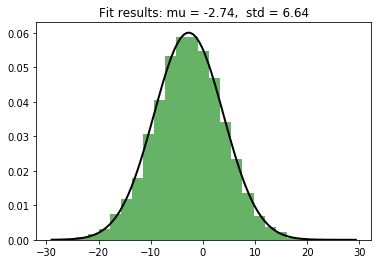

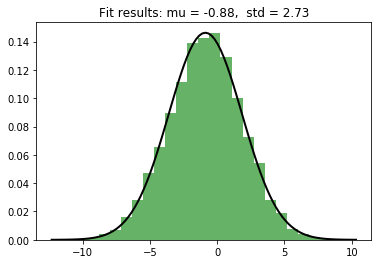

In [103]:
for el in X_selected:
    normal_distribution(df[el])

## Feature selection using Ridge/Lasso regressions

In [165]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

### Ridge regression

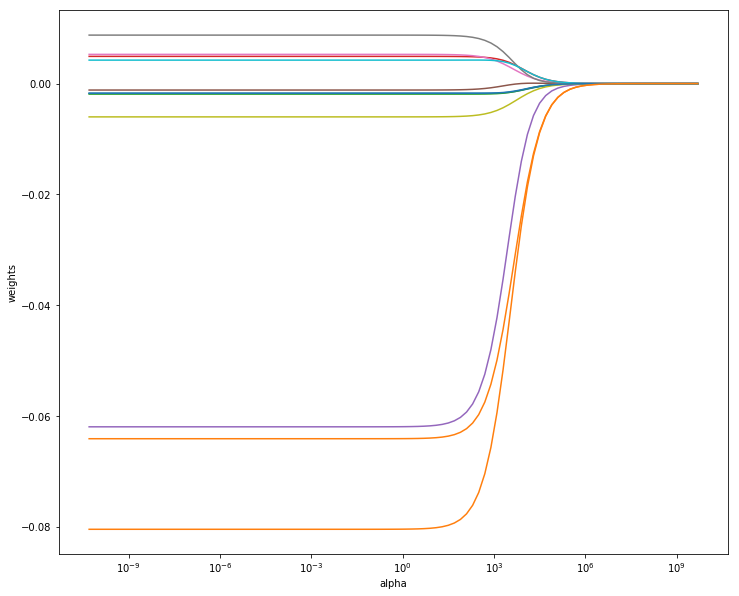

In [182]:
#Logarithmic

alphas_log = 10**np.linspace(-10,10,101)*0.5

ridge = Ridge()
coefs = []
mse = []
rscore = []

for a in alphas_log:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    predictions = ridge.predict(X_test) 
    coefs.append(ridge.coef_)
    mse.append(metrics.mean_squared_error(y_test,predictions))
    rscore.append(ridge.score(X_test, y_test))

ax = plt.gca()
ax.plot(alphas_log, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
None

### Lasso regression

In [184]:
# Separate features X from target Y
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [185]:
# Data scaling: only standarzing
sc = StandardScaler()
X = sc.fit_transform(X)

In [186]:
# Divide dataset Train set & Test set 
# test_size = proportion of the data set as a test set
# randome_state = seed random values
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


#### plot weights vs alpha (normal scale)

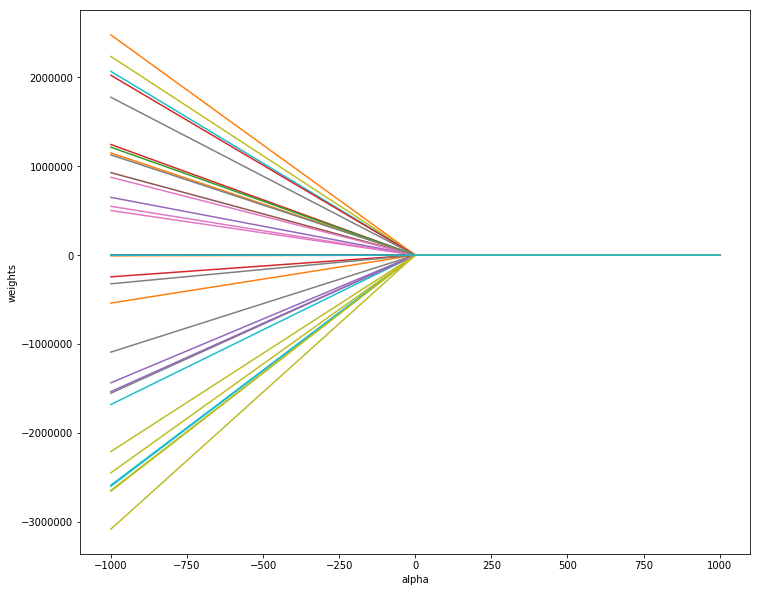

In [229]:
#Lasso Regression
alphas = np.linspace(-1000,1000,101)

lasso = Lasso(max_iter=1000)
coefs = []
mse = []
rscore = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    predictions = lasso.predict(X_test) 
    coefs.append(lasso.coef_)
    mse.append(metrics.mean_squared_error(y_test,predictions))
    rscore.append(lasso.score(X_test, y_test))

ax = plt.gca()
ax.plot(alphas, coefs)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
None

#### plot weights vs alpha (log scale)

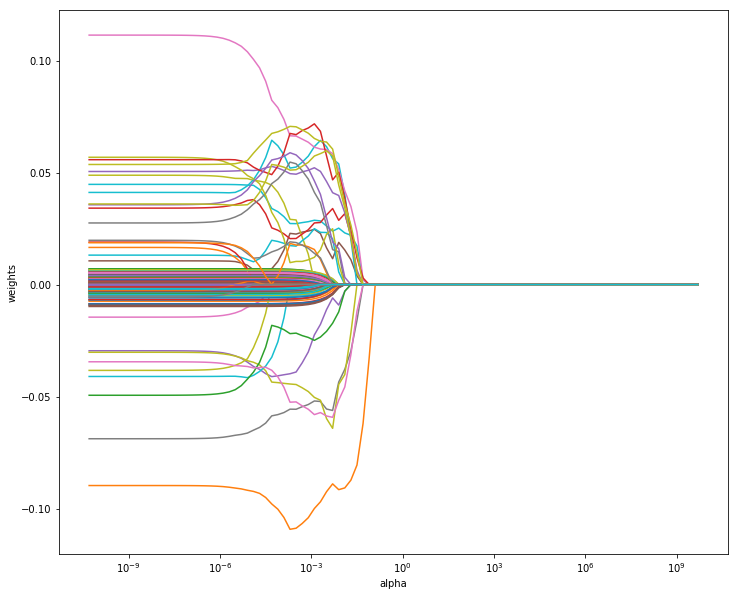

In [237]:
#Logarithmic
alphas_log = 10**np.linspace(-10,10,101)*0.5

lasso = Lasso()
coefs = []
mse = []
rscore = []

for a in alphas_log:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    predictions = lasso.predict(X_test) 
    coefs.append(lasso.coef_)
    mse.append(metrics.mean_squared_error(y_test,predictions))
    rscore.append(lasso.score(X_test, y_test))

ax = plt.gca()
ax.plot(alphas_log, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
None

#### extract coefficients 

In [240]:
df1 = pd.DataFrame(coefs)
df1.columns = df.iloc[:,:-1].columns.values

In [241]:
df1 = pd.DataFrame(coefs)
df1.columns = df.iloc[:,:-1].columns.values
df2 = pd.DataFrame(alphas)
df2.columns = ['alpha']
df3 = pd.DataFrame(mse)
df3.columns = ['mse']
df4 = pd.DataFrame(rscore)
df4.columns = ['score']
lasso_df = df2.join(df3)
lasso_df = lasso_df.join(df4)
lasso_df = lasso_df.join(df1)

In [243]:
df1.head(50)

,target,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,128
0,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528315e-04,0.044716,...,0.002171,0.018667,-0.049410,-0.001045,0.035613,-0.009318,-0.034465,-0.005582,0.035970,-0.002013
1,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528315e-04,0.044716,...,0.002171,0.018667,-0.049410,-0.001045,0.035613,-0.009318,-0.034465,-0.005582,0.035970,-0.002013
2,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528314e-04,0.044716,...,0.002171,0.018667,-0.049410,-0.001045,0.035613,-0.009318,-0.034465,-0.005582,0.035970,-0.002013
3,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528313e-04,0.044716,...,0.002171,0.018667,-0.049410,-0.001045,0.035613,-0.009318,-0.034465,-0.005582,0.035970,-0.002013
4,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528312e-04,0.044716,...,0.002171,0.018667,-0.049410,-0.001045,0.035613,-0.009318,-0.034465,-0.005581,0.035970,-0.002013
5,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528310e-04,0.044716,...,0.002171,0.018667,-0.049410,-0.001045,0.035613,-0.009318,-0.034465,-0.005581,0.035970,-0.002013
6,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528307e-04,0.044716,...,0.002171,0.018667,-0.049410,-0.001045,0.035614,-0.009318,-0.034465,-0.005581,0.035970,-0.002013
7,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528301e-04,0.044716,...,0.002171,0.018667,-0.049409,-0.001045,0.035614,-0.009318,-0.034466,-0.005581,0.035970,-0.002013
8,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528292e-04,0.044716,...,0.002171,0.018666,-0.049409,-0.001045,0.035615,-0.009318,-0.034466,-0.005580,0.035969,-0.002013
9,0.006358,0.002762,-0.001638,0.001256,0.001934,-0.003299,-0.005233,0.007007,-1.528279e-04,0.044716,...,0.002171,0.018666,-0.049408,-0.001045,0.035616,-0.009318,-0.034467,-0.005579,0.035969,-0.002013


In [248]:
#count the number of null coeff per row in the dataframe
(df1.head(50) > 0).astype(int).sum(axis=1)

0     70
1     70
2     70
3     70
4     70
5     70
6     70
7     70
8     70
9     70
10    70
11    70
12    70
13    70
14    70
15    70
16    70
17    70
18    70
19    70
20    70
21    70
22    70
23    70
24    71
25    70
26    70
27    71
28    67
29    66
30    66
31    66
32    65
33    65
34    64
35    61
36    61
37    55
38    51
39    37
40    24
41    14
42    11
43     9
44     8
45     3
46     0
47     0
48     0
49     0
dtype: int64

In [249]:
beta_coeff=df1.iloc[40,:].values

In [250]:
beta_coeff

array([ 2.40752964e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.32594703e-03,
        0.00000000e+00,  2.38301030e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.72491649e-04, -0.00000000e+00,  1.15474731e-02,
        0.00000000e+00, -5.61909151e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -5.96297723e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.61823554e-02,  6.03741785e-05, -1.85926240e-03,
       -1.83808578e-04,  3.39285627e-02,  0.00000000e+00,  0.00000000e+00,
        3.09843924e-04,  0.00000000e+00, -6.41707638e-02,  2.03781369e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.97893486e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -4.18379674e-03, -0.00000000e+00, -3.98447896e-03, -2.74408757e-03,
        0.00000000e+00, -

#### features with the highest beta coefficients

In [273]:
indices = np.argsort(beta_coeff)[::-1]

In [274]:
indices

array([118,  56, 128,  29,  83,  64,  33,  78,   9,  39, 124,  77,  15,
       108,   0,  89,  43,   7,  62,  13, 116,  36,  75,  30,  58,  34,
        59,  35,  37,  40,  41,  42, 121,  55,  44,  45,  46,  47,  49,
        52, 113,  54, 123, 114,  28,  60,   1,   2,   3,   4,   5,   6,
         8, 127,  10,  11,  12,  14,  16,  18,  19,  20,  21,  22,  23,
        25,  26,  27,  57,  61,  99,  63,  87,  88,  91,  92,  93,  94,
        96,  97,  98, 100,  84, 101, 102, 104, 105, 106, 107, 115, 109,
       111, 112,  85,  86,  82, 119, 120,  65,  66,  67,  68,  71,  72,
        73,  74,  76, 129, 117,  79,  80,  32,  69,  90, 103, 110,  31,
        51,  53,  50,  48, 125,  70,  95,  24, 122,  17, 126,  38,  81],
      dtype=int64)

In [279]:
top_20_features = list(indices[:20])
top_20_features

[118,
 56,
 128,
 29,
 83,
 64,
 33,
 78,
 9,
 39,
 124,
 77,
 15,
 108,
 0,
 89,
 43,
 7,
 62,
 13]

# data pre-processing

## Define features and target variable

In [338]:
df.columns

Index(['target',      '0',        1,        2,        3,        4,        5,
              6,        7,        8,
       ...
            120,      121,      122,      123,      124,      125,      126,
            127,      128,      129],
      dtype='object', length=131)

In [401]:
missing_features = [4, 16, 18, 20, 30, 58, 59, 63, 75, 87, 127]

In [408]:
lasso_corr_features = [4, 16, 18, 20, 30, 58, 59, 63, 75, 87, 127, 118, 56,
 128,
 29,
 83,
 64,
 33,
 78,
 9,
 39,
 124,
 77,
 15,
 108,
 0,
 89,
 43,
 7,
 62,
 13]

In [409]:
lasso_corr_features

[4,
 16,
 18,
 20,
 30,
 58,
 59,
 63,
 75,
 87,
 127,
 118,
 56,
 128,
 29,
 83,
 64,
 33,
 78,
 9,
 39,
 124,
 77,
 15,
 108,
 0,
 89,
 43,
 7,
 62,
 13]

In [432]:
features_in_both = [9, 15, 29, 33, 56, 64, 78, 83, 108, 118, 128]

In [433]:
# Separate features X from target Y
X = df.loc[:,features_in_both]
y = df.loc[:,'target']

In [434]:
df.columns

Index(['target',        0,        1,        2,        3,        4,        5,
              6,        7,        8,
       ...
            120,      121,      122,      123,      124,      125,      126,
            127,      128,      129],
      dtype='object', length=131)

## Data scaling

In [435]:
# Data scaling: only standarzing
sc = StandardScaler()
X = sc.fit_transform(X)

In [436]:
X.shape

(10000, 11)

## Split into training set and test set

In [437]:
# Divide dataset Train set & Test set 
# test_size = proportion of the data set as a test set
# randome_state = seed random values
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


In [438]:
print('training set shape:', X_train.shape)
print('test set shape:', X_test.shape)
print('training set shape:', y_train.shape)
print('test set shape:', y_test.shape)

training set shape: (7000, 11)
test set shape: (3000, 11)
training set shape: (7000,)
test set shape: (3000,)


# running different models

Models to run:
- Logistic Regression
- KNN
- SVM.VC
- RandomForest / AdaBoost
- XGBoost

Assess model perfomance using the F1 score:
- here we look at the "macro avg" F1 score from the classification report
- F1-score = 2 x (precision x Recall) / (precision + recall)
- precision = TP /(TP + FP)
- recall = TP /(TP + FN)

## Logistic regression

In [439]:
def run_log_reg(X_train, y_train, X_test, y_test, penalty, alpha):
    # load librairy
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, f1_score
    # train log reg
    logreg = LogisticRegression(penalty=penalty, C=1/alpha, class_weight = 'balanced')
    logreg.fit(X_train, y_train)
    # k-fold cross-validation
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1')
    print('f1 score cross val', 'with', penalty, 'and alpha=', alpha, 'is', scores.mean())
    # predictions
    y_pred = logreg.predict(X_test)
    print('f1 score on test set:', f1_score(y_test, y_pred))
    print('complete test results:')
    print(classification_report(y_test, y_pred))
    return y_pred

In [440]:
y_pred = run_log_reg(X_train, y_train, X_test, y_test, 'l1', 10)

f1 score cross val with l1 and alpha= 10 is 0.4782302274645668
f1 score on test set: 0.47168458781362016
complete test results:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2569
           1       0.34      0.76      0.47       431

   micro avg       0.75      0.75      0.75      3000
   macro avg       0.65      0.76      0.66      3000
weighted avg       0.86      0.75      0.79      3000



## KNN classification

In [457]:
def knn_classification(X_train, y_train, X_test, y_test, k_max): 
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score, f1_score
    k_range = range(1,k_max)
    acc_scores = {}
    f1_scores = {}
    acc_scores_list = []
    f1_scores_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred_KNN=knn.predict(X_test)
        acc_scores[k]=accuracy_score(y_test,y_pred_KNN)
        f1_scores[k]= f1_score(y_test, y_pred_KNN, average='weighted')
        f1_scores_list.append(f1_score(y_test, y_pred_KNN, average='weighted'))
        acc_scores_list.append(accuracy_score(y_test,y_pred_KNN))
    %matplotlib inline
    plt.plot(k_range, f1_scores_list)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing F1 score')
    print('best score obtained:', max(f1_scores_list))

best score obtained: 0.8927689926507993


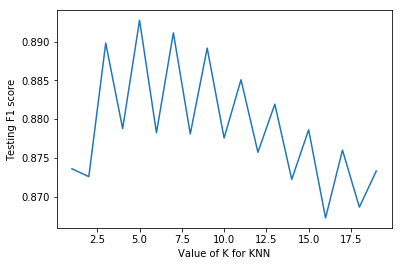

In [458]:
knn_classification(X_train, y_train, X_test, y_test,20)

In [ ]:
distances = [1, 2, 3, 4, 5]

best score obtained: 0.8875235920408818


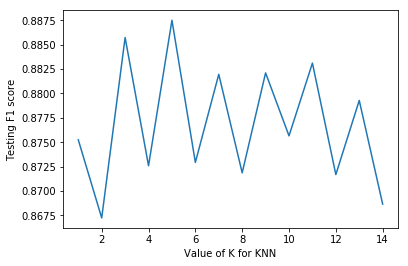

In [452]:
knn_classification(X_train, y_train, X_test, y_test,15,4)

In [109]:
def save_model(search_name, model, model_folder='models'):
​
    if not os.path.exists(model_folder):
        os.mkdir(model_folder)
    
    time_str = dt.datetime.today().strftime('%Y%m%d-%H%M')
    fname_model = search_name + '_' + time_str + '.pkl'
    model_fpath = os.path.join(model_folder, fname_model)
    
    # Save it to a file, to be pushed to production
    #check if it exists!
    
    if not os.path.isfile(model_fpath):
        
        with open(model_fpath, 'wb') as file:
            pickle.dump(model, file=file)
        
    else:
        fname_model = search_name + '_' + time_str + '_copy' + '.pkl'
        model_fpath = os.path.join(model_folder,fname_model)
        
        with open(model_fpath, 'wb') as file:
            pickle.dump(model, file=file)
    
    return

mean score logistic regression with l2 and alpha= 1000 is 0.3274903222755948


## SVM.VC (support vector machine)

### SVM.VC using the top features (lasso + correlation selections)

In [443]:
run_svm(X_train,y_train,X_test,y_test,'rbf')

f1_score: 0.625

confusion matrix:
[[2211  358]
 [  72  359]]
complete test results:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2569
           1       0.50      0.83      0.63       431

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.73      0.85      0.77      3000
weighted avg       0.90      0.86      0.87      3000



### SVM.VC using all features

In [210]:
# Separate features X from target Y
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [211]:
# Data scaling: only standarzing
sc = StandardScaler()
X = sc.fit_transform(X)

In [212]:
# Divide dataset Train set & Test set 
# test_size = proportion of the data set as a test set
# randome_state = seed random values
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


In [213]:
y_test

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [271]:
def run_svm(X_train,y_train,X_test,y_test,kernel):
    """
    kernel functions:
    'linear'
    'rbf'
    'poly'
    """
    #import
    from sklearn import svm
    # define the model with the kernel
    # try different kernel functions: linear, poly, sigmoid, rbf (gaussian kernel)
    SVM = svm.SVC(C=10,kernel=kernel,class_weight='balanced',gamma=0.005,random_state=0)
    #Train the model using the training sets
    SVM.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred_SVM = SVM.predict(X_test)
    # Print the accuracy (performance metric of the model)
    print('f1_score:', round(metrics.f1_score(y_test,y_pred_SVM),3))
    print()
    print('confusion matrix:')
    print(confusion_matrix(y_test, y_pred_SVM))
    # print the test results
    print('complete test results:')
    print(classification_report(Y_test, y_pred_SVM))

In [425]:
run_svm(X_train,y_train,X_test,y_test,'linear')

f1_score: 0.546

confusion matrix:
[[2028  541]
 [  66  365]]
complete test results:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      2569
           1       0.40      0.85      0.55       431

   micro avg       0.80      0.80      0.80      3000
   macro avg       0.69      0.82      0.71      3000
weighted avg       0.89      0.80      0.82      3000



In [424]:
run_svm(X_train,y_train,X_test,y_test,'rbf')

f1_score: 0.747

confusion matrix:
[[2347  222]
 [  42  389]]
complete test results:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      2569
           1       0.64      0.90      0.75       431

   micro avg       0.91      0.91      0.91      3000
   macro avg       0.81      0.91      0.85      3000
weighted avg       0.93      0.91      0.92      3000



In [217]:
run_svm(X_train,y_train,X_test,y_test,'poly')

f1_score: 0.286

confusion matrix:
[[2562    7]
 [ 358   73]]
complete test results:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2569
           1       0.91      0.17      0.29       431

   micro avg       0.88      0.88      0.88      3000
   macro avg       0.89      0.58      0.61      3000
weighted avg       0.88      0.88      0.84      3000



Best score for SVM: f1_score: 0.761

### Grid Search
help: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

- kernel: selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane
- gamma: parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set


In [247]:
pipeline = Pipeline([('scl', StandardScaler()),('svm', svm.SVC(kernel='rbf', class_weight='balanced'))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


param_grid = {
              "svm__C": [1, 10],
              "svm__gamma":[0.1, 1, 10, 100]
             }

#set cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

clf_gs = GridSearchCV(pipeline, param_grid,cv=cv)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 7000 samples.
Testing set has 3000 samples.


KeyboardInterrupt: 

##  Adaboost

In [459]:
# Feature classifier - Adaboost
def run_adaboost(X_train,y_train,X_test,y_test):
    from sklearn.ensemble import AdaBoostClassifier
    adb_cl = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=500)
    adb_cl.fit(X_train, y_train)
    y_pred_adb_cl = adb_cl.predict(X_test)
    # Print the accuracy (performance metric of the model)
    print('f1_score:', round(metrics.f1_score(y_test,y_pred_adb_cl),3))
    print()
    print('confusion matrix:')
    print(confusion_matrix(y_test, y_pred_adb_cl))
    # print the test results
    print('complete test results:')
    print(classification_report(y_test, y_pred_adb_cl))

In [460]:
run_adaboost(X_train,y_train,X_test,y_test)

f1_score: 0.444

confusion matrix:
[[2475   94]
 [ 281  150]]
complete test results:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2569
           1       0.61      0.35      0.44       431

   micro avg       0.88      0.88      0.88      3000
   macro avg       0.76      0.66      0.69      3000
weighted avg       0.86      0.88      0.86      3000



In [429]:
pipeline = Pipeline([('scl', StandardScaler()),('ada_boost', AdaBoostClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


param_grid = {
              "ada_boost__n_estimators": [200,300,400,500,600]
             }

#set cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

clf_gs = GridSearchCV(pipeline, param_grid,cv=cv)
clf_gs.fit(X_train, y_train)

#print(clf_gs.cv_results_)

print("Best score: %s" % (clf_gs.best_score_))
print("Best parameter set: %s" % (clf_gs.best_params_))
predictions = clf_gs.predict(X_test)

Training set has 7000 samples.
Testing set has 3000 samples.
Best score: 0.8768571428571429
Best parameter set: {'ada_boost__n_estimators': 500}
